# Proyecto Final - Recurrencia diferenciada del cáncer de tiroides

https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence


Este conjunto de datos contiene 13 características clinicopatológicas con el objetivo de predecir la recurrencia del cáncer de tiroides bien diferenciado. El conjunto de datos se recopiló en una duración de 15 años y se realizó un seguimiento de cada paciente durante al menos 10 años.

### Integrantes:
### Laura David
### Mónica González

In [1]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from category_encoders import TargetEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SequentialFeatureSelector



# Analisis del Data set

In [76]:
# Cargar los datos de entrenamiento
data_train = pd.read_csv("dataset/Thyroid_Diff.csv")

In [77]:
# Dimensiones de train
data_train.shape

(383, 17)

In [78]:
# Información de los datos de entrenamiento
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

### CORRECCION DE LOS TIPOS DE DATOS

Se hizo revisión del data set y se identificaron cuales serían las variables numéricas y cuales las categóricas.

In [79]:
# Corregir el tipo de los datos: se tiene un array con las variables numericas 
# y se convierten a categoricas las que no estén en el 
num_cols = [
'Age']

# Columnas categoricas de train
cat_cols_train = []

for col in data_train.columns:
    if col not in num_cols:
        data_train[col] = data_train[col].astype('category')
        cat_cols_train.append(col)

In [80]:
# Información de los datos de entrenamiento
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   383 non-null    int64   
 1   Gender                383 non-null    category
 2   Smoking               383 non-null    category
 3   Hx Smoking            383 non-null    category
 4   Hx Radiothreapy       383 non-null    category
 5   Thyroid Function      383 non-null    category
 6   Physical Examination  383 non-null    category
 7   Adenopathy            383 non-null    category
 8   Pathology             383 non-null    category
 9   Focality              383 non-null    category
 10  Risk                  383 non-null    category
 11  T                     383 non-null    category
 12  N                     383 non-null    category
 13  M                     383 non-null    category
 14  Stage                 383 non-null    category
 15  Respon

### TRATAMIENTO DE DATOS NULOS

In [81]:
# Analisis de datos faltantes en train
missing_values_train = data_train.isnull().sum()
print("Porcentaje de datos nulos en train:", len(missing_values_train[missing_values_train>0]*100/len(data_train)))

Porcentaje de datos nulos en train: 0


Se identifica que el dataset no tiene valores nullos que deban ser procesados.

### ANALISIS DE REGISTROS DUPLICADOS

In [82]:
# Analisis de registros duplicados exactos
print("Número de duplicados en train:", data_train.duplicated().sum())

Número de duplicados en train: 19


In [83]:
#Visualización de la data duplicada en el dataset train
df_duplicates = data_train[data_train.duplicated()]
# si hay valores redundantes o inconsistentes, imprime
if len(df_duplicates)>0:
  print('\nMuestras redundantes o inconsistentes:')
  display(df_duplicates)
else:
  print('No existen valores duplicados')


Muestras redundantes o inconsistentes:


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
32,36,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
38,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
40,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
66,35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
69,51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
77,29,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
120,37,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
121,26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
123,28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
132,32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No


Procedemos a eliminar estos valores duplicados

In [84]:
data_train = data_train.drop_duplicates(keep = 'first')

In [85]:
#Consultamos si aún aparecen duplicados
# Analisis de registros duplicados exactos
print("Número de duplicados en train:", data_train.duplicated().sum())

Número de duplicados en train: 0


Finalizamos la etapa de los valores duplicados, garantizando que ya no existen en el data_train

# ANALISIS EXPLORATORIO

## REVISIÓN VARIABLES NUMÉRICAS

In [12]:
# Resumen estadístico para train
data_train.describe()

,Age
count,364.00000
mean,41.25000
std,15.31436
min,15.00000
25%,30.00000
50%,38.00000
75%,52.00000
max,82.00000


### CORRELACION DE LOS DATOS NUMÉRICOS

Se revisa la correlación de las variables numéricas contra Recurred , pero esto no aplica porque la variable Recurred es categórica.

## REVISIÓN VARIABLES CATEGÓRICAS

In [86]:
# Identificar columnas categóricas basadas en su tipo de dato
variables_categoricas = data_train.select_dtypes(include=['category']).columns.tolist()

# Mostrar las variables categóricas
print("Variables categóricas:", variables_categoricas)

Variables categóricas: ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']


In [87]:
# Mostrar valores únicos y cantidad de valores únicos de las variables categóricas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas sin límite
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas sin límite
pd.set_option('max_colwidth', None)  # Mostrar valores completos sin truncar

# Mostrar todas las variables categóricas y sus valores únicos
for col in variables_categoricas:
    print(f'Variable: {col}')
    unique_values = list(data_train[col].unique())  # Convertimos a lista para evitar truncamiento
    print(f'Valores únicos ({len(unique_values)}):')
    print(unique_values)  # Imprimir todos los valores
    print('-' * 50)


Variable: Gender
Valores únicos (2):
['F', 'M']
--------------------------------------------------
Variable: Smoking
Valores únicos (2):
['No', 'Yes']
--------------------------------------------------
Variable: Hx Smoking
Valores únicos (2):
['No', 'Yes']
--------------------------------------------------
Variable: Hx Radiothreapy
Valores únicos (2):
['No', 'Yes']
--------------------------------------------------
Variable: Thyroid Function
Valores únicos (5):
['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism', 'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism']
--------------------------------------------------
Variable: Physical Examination
Valores únicos (5):
['Single nodular goiter-left', 'Multinodular goiter', 'Single nodular goiter-right', 'Normal', 'Diffuse goiter']
--------------------------------------------------
Variable: Adenopathy
Valores únicos (6):
['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior']
----------------------------------

In [88]:
# Obtener un resumen descriptivo transpuesto para variables categóricas
resumen_categoricas = data_train[variables_categoricas].describe(include='all').T

# Mostrar el resumen
print(resumen_categoricas)

                     count unique                  top freq
Gender                 364      2                    F  293
Smoking                364      2                   No  315
Hx Smoking             364      2                   No  336
Hx Radiothreapy        364      2                   No  357
Thyroid Function       364      5            Euthyroid  313
Physical Examination   364      5  Multinodular goiter  135
Adenopathy             364      6                   No  258
Pathology              364      4            Papillary  271
Focality               364      2            Uni-Focal  228
Risk                   364      3                  Low  230
T                      364      7                   T2  138
N                      364      3                   N0  249
M                      364      2                   M0  346
Stage                  364      5                    I  314
Response               364      4            Excellent  189
Recurred               364      2       

### ANALISIS ANOVA

El objetivo es determinar si la variable categórica tiene un efecto significativo sobre la variable objetivo, comparando las medias de los diferentes grupos.

H0: No existe una diferencia estadísticamente significativa entre las medias de los grupos definidos por la variable categórica en relación a la variable objetivo.

H1: Existe al menos una diferencia estadísticamente significativa entre las medias de los grupos definidos por la variable categórica en relación a la variable objetivo.

In [89]:
# Se aplica análisis ANOVA para descartar variables categoricas no significativas
# para la prediccion de la variable objetivo
import scipy.stats as stats

def anova_test(df, target, feature):
  df_anova = df[[feature, target]]
  grps = pd.unique(df[feature].values)
  d_data = {grp:df_anova[target][df_anova[feature] == grp].to_numpy() for grp in grps}
  result = ""
  test_grps = [d_data[grp] for grp in grps]
  F, p = stats.f_oneway(*test_grps)
  
  if p > 0.05:
    print("p-value for significance is: ", p)
    print("accept null hypothesis")
    result="{0} groups' are not different".format(feature)
    print(result)
    print('-'*50)

In [90]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   364 non-null    int64   
 1   Gender                364 non-null    category
 2   Smoking               364 non-null    category
 3   Hx Smoking            364 non-null    category
 4   Hx Radiothreapy       364 non-null    category
 5   Thyroid Function      364 non-null    category
 6   Physical Examination  364 non-null    category
 7   Adenopathy            364 non-null    category
 8   Pathology             364 non-null    category
 9   Focality              364 non-null    category
 10  Risk                  364 non-null    category
 11  T                     364 non-null    category
 12  N                     364 non-null    category
 13  M                     364 non-null    category
 14  Stage                 364 non-null    category
 15  Response   

Identificamos que todas las variables categoricas 

## Definición del ChiSquare

Vamos a determinar la significancia de las variables categóricas vs la variable objetivo : Recurred, también categórica

In [91]:
# Declaración de clase para generar prueba chi cuadrado para determinar la significancia de las variables categóricas vs la variable objetivo, también categórica
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None

        self.dfObserved = None
        self.dfExpected = None

    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)

    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)

        self.dfObserved = pd.crosstab(Y,X)
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof

        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)

        self._print_chisquare_result(colX,alpha)

In [92]:
cT = ChiSquare(data_train)
for var in data_train.columns:
    if var != 'Recurred' and data_train[var].dtypes == 'category':
        cT.TestIndependence(colX=var,colY='Recurred')

Gender is IMPORTANT for Prediction
Smoking is IMPORTANT for Prediction
Hx Smoking is IMPORTANT for Prediction
Hx Radiothreapy is IMPORTANT for Prediction
Thyroid Function is NOT an important predictor. (Discard Thyroid Function from model)
Physical Examination is IMPORTANT for Prediction
Adenopathy is IMPORTANT for Prediction
Pathology is IMPORTANT for Prediction
Focality is IMPORTANT for Prediction
Risk is IMPORTANT for Prediction
T is IMPORTANT for Prediction
N is IMPORTANT for Prediction
M is IMPORTANT for Prediction
Stage is IMPORTANT for Prediction
Response is IMPORTANT for Prediction


A partir del resultado anterior, se puede apreciar que la variable Thyroid Function no es importante para predecir la recurrencia del cancer, por lo que podemos descartar esta columna del dataset.

In [93]:
data_train= data_train.drop(['Thyroid Function'], axis=1)

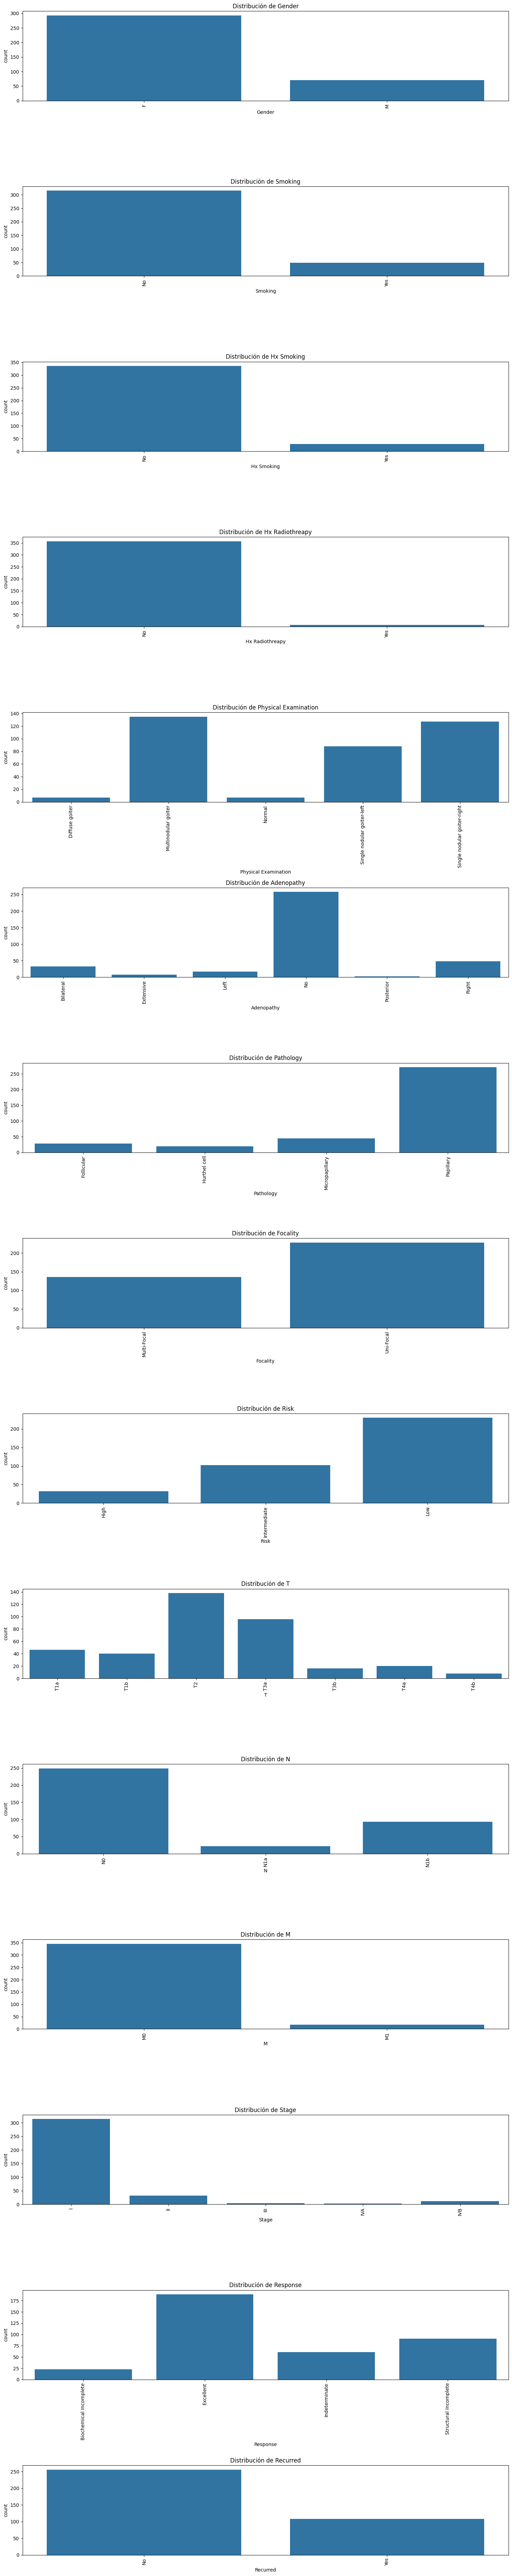

In [94]:
# Variables categóricas
# Seleccionar las columnas categóricas
categorical_columns = data_train.select_dtypes(include='category').columns

# Configurar el tamaño de la cuadrícula
n_cols = 1  # Número de gráficos por fila
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calcular el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Ajustar el tamaño total del canvas
axes = axes.flatten()  # Asegurar que los ejes están en un arreglo plano

# Crear un gráfico para cada columna categórica
for i, col in enumerate(categorical_columns):
    sns.countplot(data=data_train, x=col, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje X

# Si hay más ejes que gráficos, ocultarlos
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])  # Eliminar ejes no utilizados

# Ajustar el espacio entre filas
plt.subplots_adjust(hspace=60)  # Cambiar a un valor mayor para aumentar el espacio entre filas

plt.tight_layout()  # Ajustar los espacios entre gráficos (opcional)
plt.show()

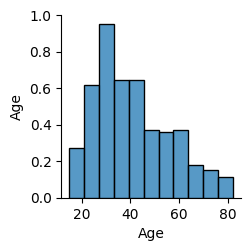

In [22]:
# Diagrama de pares de todas las variables numérica del data set
sns.pairplot(data_train)

### Detección de valores atípicos

In [95]:
# Se vuelven a obtener las columnas numéricas actualizadas
numeric_columns = data_train.select_dtypes(include=['float64', 'int64']).columns

In [96]:
numeric_columns

Index(['Age'], dtype='object')

se genera gráfico de boxplot para la variable Age, y se identifica que no hay valores atípicos

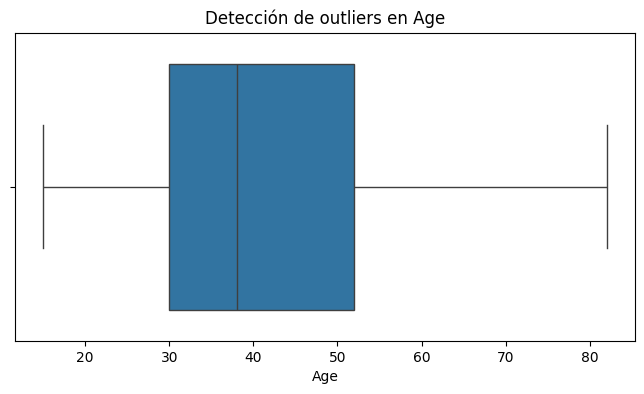

In [97]:
numeric_columns = data_train.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data_train, x=col)
    plt.title(f'Detección de outliers en {col}')
    plt.show()

# Feature Engineering

## Codificar variable objetivo y categóricas binarias

In [98]:
# Codificar la variable objetivo como una variable numérica
target_values = {
        'No': 0,
        'Yes': 1
}

target_values_inverse = {v: k for k, v in target_values.items()}

data_train['Recurred'] = data_train['Recurred'].replace(target_values).astype(int)

C:\Users\Monik\AppData\Local\Temp\ipykernel_9840\2486632076.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train['Recurred'] = data_train['Recurred'].replace(target_values).astype(int)
C:\Users\Monik\AppData\Local\Temp\ipykernel_9840\2486632076.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_train['Recurred'] = data_train['Recurred'].replace(target_values).astype(int)


In [99]:
# Codificar las variables categóricas binarias como variables numéricas

data_train['Gender'] = data_train['Gender'].replace({
    'M': 0,
    'F': 1
}).astype(int)

data_train['Smoking'] = data_train['Smoking'].replace({
    'No': 0,
    'Yes': 1
}).astype(int)

data_train['Hx Smoking'] = data_train['Hx Smoking'].replace({
    'No': 0,
    'Yes': 1
}).astype(int)

data_train['Hx Radiothreapy'] = data_train['Hx Radiothreapy'].replace({
    'No': 0,
    'Yes': 1
}).astype(int)

data_train['Focality'] = data_train['Focality'].replace({
    'Uni-Focal': 0,
    'Multi-Focal': 1
}).astype(int)

data_train['Risk'] = data_train['Risk'].replace({
    'Low': 0,
    'Intermediate': 1,
    'High': 2
}).astype(int)

data_train['N'] = data_train['N'].replace({
    'N0': 0,
    'N1a': 1,
    'N1b': 2
}).astype(int)

data_train['M'] = data_train['M'].replace({
    'M0': 0,
    'M1': 1
}).astype(int)

C:\Users\Monik\AppData\Local\Temp\ipykernel_9840\1218373391.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train['Gender'] = data_train['Gender'].replace({
C:\Users\Monik\AppData\Local\Temp\ipykernel_9840\1218373391.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_train['Gender'] = data_train['Gender'].replace({
C:\Users\Monik\AppData\Local\Temp\ipykernel_9840\1218373391.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result

In [100]:
# Actualizar el listado de variables categoricas
cat_cols = [col for col in data_train.columns if data_train[col].dtypes == 'category' and col != 'Recurred']

In [29]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   364 non-null    int64   
 1   Gender                364 non-null    int64   
 2   Smoking               364 non-null    int64   
 3   Hx Smoking            364 non-null    int64   
 4   Hx Radiothreapy       364 non-null    int64   
 5   Physical Examination  364 non-null    category
 6   Adenopathy            364 non-null    category
 7   Pathology             364 non-null    category
 8   Focality              364 non-null    int64   
 9   Risk                  364 non-null    int64   
 10  T                     364 non-null    category
 11  N                     364 non-null    int64   
 12  M                     364 non-null    int64   
 13  Stage                 364 non-null    category
 14  Response              364 non-null    category
 15  Recurred   

## División de los datos

In [101]:
# Se crean las variables X e y
X = data_train.drop('Recurred', axis=1)
y = data_train['Recurred']

## Datos de entrenamiento

### Codificación de variables categóricas

Se utilizará un codificador de objetivos (TargetEncoder) para transformar las variables categóricas en el conjunto de entrenamiento (X) en valores numéricos, basándose en la relación entre las categorías y el objetivo (y) antes de hacer la división de los datos

In [102]:
print(X.dtypes)

Age                        int64
Gender                     int64
Smoking                    int64
Hx Smoking                 int64
Hx Radiothreapy            int64
Physical Examination    category
Adenopathy              category
Pathology               category
Focality                   int64
Risk                       int64
T                       category
N                          int64
M                          int64
Stage                   category
Response                category
dtype: object


In [103]:
encoder = TargetEncoder(cols=cat_cols)

X[cat_cols] = encoder.fit_transform(X[cat_cols], y)

In [104]:
# Se verifica como quedaron los valores de X
X.head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,1,0,0,0,0.295456,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.117720
1,34,1,0,1,0,0.385184,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.005291
2,30,1,0,0,0,0.220474,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.005291
3,62,1,0,0,0,0.220474,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.005291
4,62,1,0,0,0,0.385184,0.116279,0.022507,1,0,0.04075,0,0,0.207006,0.005291
5,52,0,1,0,0,0.385184,0.116279,0.022507,1,0,0.04075,0,0,0.207006,0.117720
6,41,1,0,1,0,0.220474,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.005291
7,46,1,0,0,0,0.220474,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.005291
8,51,1,0,0,0,0.220474,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.005291
9,40,1,0,0,0,0.220474,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.005291


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   364 non-null    int64  
 1   Gender                364 non-null    int64  
 2   Smoking               364 non-null    int64  
 3   Hx Smoking            364 non-null    int64  
 4   Hx Radiothreapy       364 non-null    int64  
 5   Physical Examination  364 non-null    float64
 6   Adenopathy            364 non-null    float64
 7   Pathology             364 non-null    float64
 8   Focality              364 non-null    int64  
 9   Risk                  364 non-null    int64  
 10  T                     364 non-null    float64
 11  N                     364 non-null    int64  
 12  M                     364 non-null    int64  
 13  Stage                 364 non-null    float64
 14  Response              364 non-null    float64
dtypes: float64(6), int64(9)
memo

### Estandarización de los datos

Escalamiento de los datos de entrenamiento

In [105]:
scaler_train = StandardScaler()

In [106]:
X[num_cols] = scaler_train.fit_transform(X[num_cols])

In [37]:
X.head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,-0.931780,1,0,0,0,0.295456,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.117720
1,-0.474064,1,0,1,0,0.385184,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.005291
2,-0.735616,1,0,0,0,0.220474,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.005291
3,1.356803,1,0,0,0,0.220474,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.005291
4,1.356803,1,0,0,0,0.385184,0.116279,0.022507,1,0,0.04075,0,0,0.207006,0.005291
5,0.702922,0,1,0,0,0.385184,0.116279,0.022507,1,0,0.04075,0,0,0.207006,0.117720
6,-0.016347,1,0,1,0,0.220474,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.005291
7,0.310593,1,0,0,0,0.220474,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.005291
8,0.637534,1,0,0,0,0.220474,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.005291
9,-0.081735,1,0,0,0,0.220474,0.116279,0.022507,0,0,0.04075,0,0,0.207006,0.005291


In [107]:
# Division 70-30 de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (254, 15)
Dimensiones de y_train: (254,)
Dimensiones de X_test: (110, 15)
Dimensiones de y_test: (110,)


## Balanceo de los datos de entrenamiento

<Axes: xlabel='Recurred'>

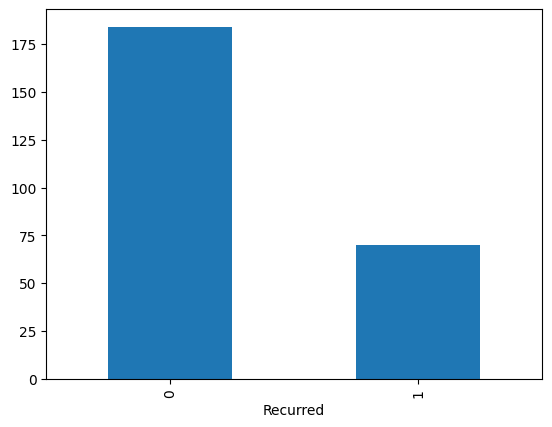

In [109]:
# Se observa que hay un poco de desbalanceo
y_train.value_counts().plot(kind='bar')

## Se utilizará la técnica SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) es una técnica de sobremuestreo utilizada para abordar el problema de desbalanceo de clases en los conjuntos de datos. Esta técnica genera ejemplos sintéticos de la clase minoritaria (es decir, las clases menos representadas en el conjunto de datos) en lugar de simplemente duplicar los ejemplos existentes, lo que podría llevar a un sobreajuste. SMOTE se utiliza comúnmente en problemas de clasificación cuando se tiene un desbalance significativo entre las clases.

In [110]:
sm = SMOTE(random_state=42, n_jobs=-1)
X_train, y_train = sm.fit_resample(X_train, y_train)

d:\carpetas_sistema\escritorio\Especializacion\11. Machine Learning\Talleres\taller1_ML\venv\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


<Axes: xlabel='Recurred'>

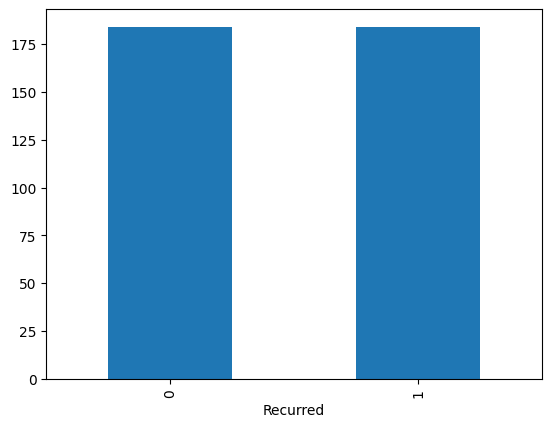

In [111]:
# Se observa que ya no hay desbalance 
y_train.value_counts().plot(kind='bar')

## Datos de prueba
Como se hizo la transformación antes de dividir los datos, ya está los datos codificados también en los datos de prueba

In [48]:
X_test.head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
212,-2.659846,1,0,0,0,0.296703,0.296703,0.296703,0,1,0.296703,2,0,0.296703,0.296703
34,-2.651295,0,1,0,0,0.296703,0.296703,0.296703,0,0,0.296703,0,0,0.296703,0.296703
15,-2.694051,1,0,0,0,0.296703,0.296703,0.296703,0,0,0.296703,0,0,0.296703,0.296703
366,-2.599988,1,0,1,0,0.296703,0.296703,0.296703,1,2,0.296703,0,1,0.296703,0.296703
60,-2.771012,0,0,0,0,0.296703,0.296703,0.296703,0,0,0.296703,0,0,0.296703,0.296703
202,-2.788114,0,0,0,0,0.296703,0.296703,0.296703,1,1,0.296703,2,0,0.296703,0.296703
82,-2.758185,1,0,0,0,0.296703,0.296703,0.296703,0,0,0.296703,0,0,0.296703,0.296703
128,-2.604264,1,0,0,0,0.296703,0.296703,0.296703,0,0,0.296703,0,0,0.296703,0.296703
164,-2.749634,1,0,0,0,0.296703,0.296703,0.296703,1,0,0.296703,0,0,0.296703,0.296703
136,-2.783839,1,0,0,0,0.296703,0.296703,0.296703,0,0,0.296703,0,0,0.296703,0.296703


# Entrenamiento y selección de modelos

## Entrenamiento con validación cruzada

In [112]:
# Métricas a utilizar
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [113]:
# Algoritmos seleccionados
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

## Validación cruzada con KFold con algoritmos de clasificación

In [114]:
# Validación cruzada con KFold
seed = 2
models = []
#logistic Regression
models.append(('LR', LogisticRegression()))
# Decision Tree classifier
models.append(('CART', DecisionTreeClassifier()))
# Naïve Bayes
models.append(('NB', GaussianNB()))
# Random Forest
models.append(('RF', RandomForestClassifier()))
# KNN
models.append(('KNN', neighbors.KNeighborsClassifier(n_neighbors=3)))
# NN
models.append(('NN', MLPClassifier(activation='relu', hidden_layer_sizes=(24, 16, 8, 4),
                                   learning_rate='constant', learning_rate_init=0.01,
                                   momentum=0.09, max_iter=100, verbose=False)))
# Linear SVM
models.append(('LSVM', SVC(kernel='linear')))
# Kernel SVM
models.append(('KSVM', SVC(kernel = 'rbf', random_state = 0)))

# evaluate each model in turn
results = []
names = []
results_metrics = []

#scoring = {
#    'accuracy': 'accuracy',
#    'precision': 'precision_weighted', # Precision ponderada para multiclase
#    'recall': 'recall_weighted',       # Recall ponderado para multiclase
#    'f1': 'f1_weighted'                # F1 ponderado para multiclase
#}

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

print("Media del desempeño de los modelos en el conjunto de testeo")
print("#"*50)
for name, model in models:
    # Kfold cross validation for model selection
    kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    #X train , y train
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = {}
    msg = {
        'mean': {
                'accuracy': np.mean(cv_results['test_accuracy']),
                'precision': np.mean(cv_results['test_precision_weighted']),
                'recall': np.mean(cv_results['test_recall_weighted']),
                'f1': np.mean(cv_results['test_f1_weighted'])
        },
        'std': {
                'accuracy': np.std(cv_results['test_accuracy']),
                'precision': np.std(cv_results['test_precision_weighted']),
                'recall': np.std(cv_results['test_recall_weighted']),
                'f1': np.std(cv_results['test_f1_weighted'])
        }
    }
    results_metrics.append(msg)
    print(name)
    print(pd.DataFrame(msg))
    print("#"*50)

Media del desempeño de los modelos en el conjunto de testeo
##################################################
LR
               mean       std
accuracy   0.951201  0.028999
precision  0.954267  0.027356
recall     0.951201  0.028999
f1         0.951070  0.029145
##################################################
CART
               mean       std
accuracy   0.940165  0.031915
precision  0.945507  0.028155
recall     0.940165  0.031915
f1         0.939881  0.032193
##################################################
NB
               mean       std
accuracy   0.907658  0.036652
precision  0.914516  0.034115
recall     0.907658  0.036652
f1         0.907189  0.037168
##################################################
RF
               mean       std
accuracy   0.970195  0.018910
precision  0.971944  0.017706
recall     0.970195  0.018910
f1         0.970149  0.018948
##################################################
KNN
               mean       std
accuracy   0.937462  0.039042
precisi

Se puede observar que los mejores modelos que se nos presentan son el RandomForestClassifier con una media de 0.97 y una desviación de 0.023 para la métrica de precision y DecisionTreeClassifier con una media de 0.95 y una desviación de 0.03 

## Selección del modelo

Para el ejercico se tomarán:

1. Modelo baseline: DecisionTreeClassifier

2. Modelo Gold:  RandomForestClassifier

### Modelo baseline: DecisionTreeClassifier

In [115]:
# Se entrena el modelo CART (DecisionTreeClassifier)

dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : [2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5],
         'ccp_alpha': [0, 0.01, 0.02, 0.03] }

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

d:\carpetas_sistema\escritorio\Especializacion\11. Machine Learning\Talleres\taller1_ML\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'ccp_alpha': 0.01,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [116]:
# Passing best parameter for the Hyperparameter Tuning
dt = DecisionTreeClassifier(**gsearch.best_params_, random_state=1)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

In [118]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.92      0.95        38

    accuracy                           0.96       110
   macro avg       0.97      0.95      0.96       110
weighted avg       0.96      0.96      0.96       110



In [119]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.9728260869565217
Accuracy of Decision Tree-Test:  0.9636363636363636


### Modelo Gold: RandomForestClassifier 

In [123]:
# Paso 1: Definir el modelo base
clf = RandomForestClassifier(random_state=42)

# Paso 2: Definir los hiperparámetros para la búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],        # Número de árboles
    'max_depth': [None, 10, 20, 30],      # Profundidad máxima
    'min_samples_split': [2, 5, 10],      # Mínimas muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],        # Mínimas muestras en una hoja
    'bootstrap': [True, False]            # Usar o no bootstrap
}

# Paso 3: Realizar la búsqueda de los mejores hiperparámetros
gsearch = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=3,                   # Validación cruzada
    scoring='accuracy',     # Métrica de evaluación
    n_jobs=-1               # Usar todos los núcleos disponibles
)
gsearch.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", gsearch.best_params_)

Mejores hiperparámetros: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


d:\carpetas_sistema\escritorio\Especializacion\11. Machine Learning\Talleres\taller1_ML\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [124]:
# Paso 4: Entrenar el modelo con los mejores hiperparámetros
best_clf = RandomForestClassifier(**gsearch.best_params_, random_state=42)
best_clf.fit(X_train, y_train)

# Paso 5: Evaluar el modelo
y_pred = best_clf.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.97      0.95      0.96        38

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110



### Gráfica de importancia de las características.
Para ver qué tan relevante es cada variable para la predicción.

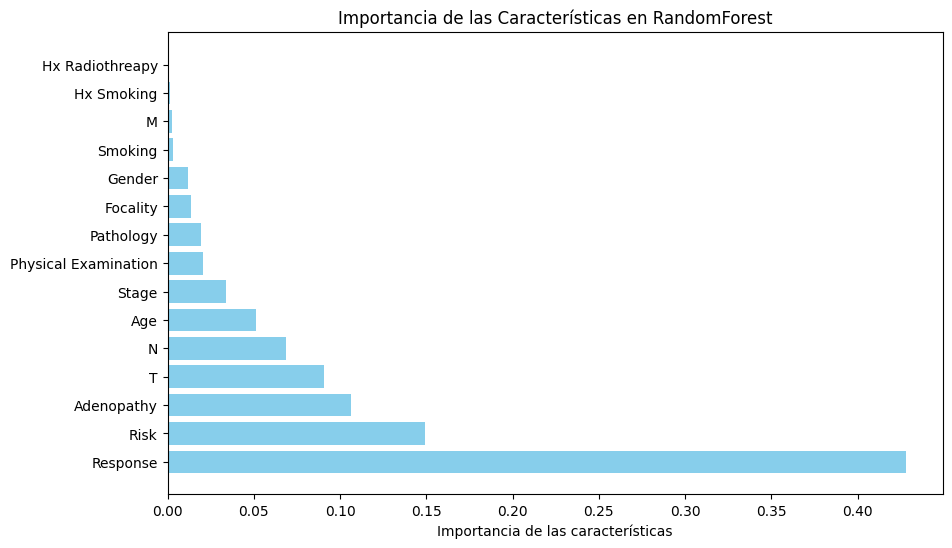

In [125]:
# Obtener la importancia de las características
importances = best_clf.feature_importances_

# Obtener los nombres de las características (puedes usar X_train.columns si tienes un DataFrame)
features = X_train.columns

# Ordenar las características por su importancia
indices = np.argsort(importances)[::-1]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances[indices], color='skyblue')
plt.xlabel('Importancia de las características')
plt.title('Importancia de las Características en RandomForest')
plt.show()

### Matriz de Confusión
Para ver cómo se están clasificando las instancias en cada clase.

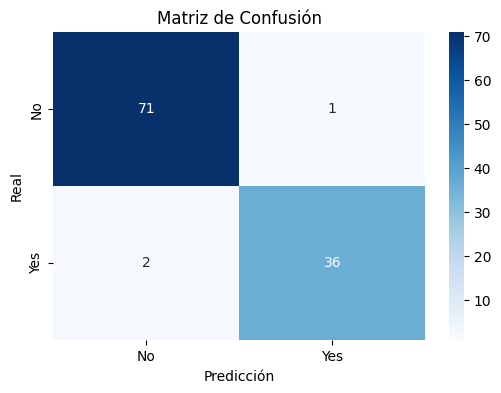

In [126]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

### Curva ROC
La curva ROC (Receiver Operating Characteristic) es útil para evaluar el rendimiento de un clasificador binario, especialmente cuando se trata de desequilibrio de clases.

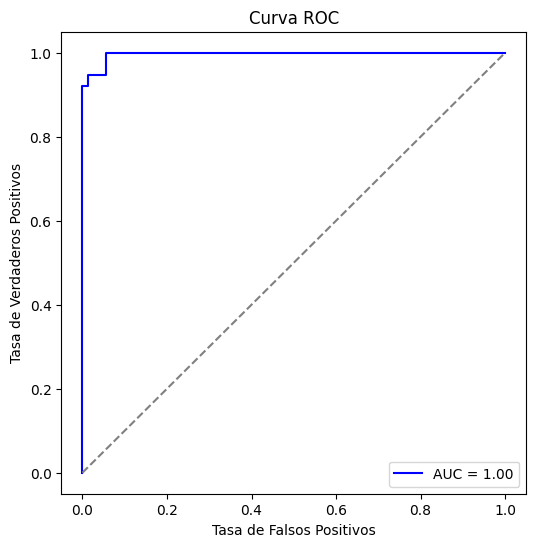

In [129]:
from sklearn.metrics import roc_curve, auc

# Calcular la probabilidad de la clase positiva
y_prob = best_clf.predict_proba(X_test)[:, 1]

# Calcular los valores de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### Gráfico de Validación del Modelo
Grafica el desempeño en entrenamiento y validación (por ejemplo, el accuracy o f1-score) a lo largo de las iteraciones del GridSearchCV. Esto te ayuda a visualizar cómo cambian los resultados a medida que ajustas los hiperparámetros.

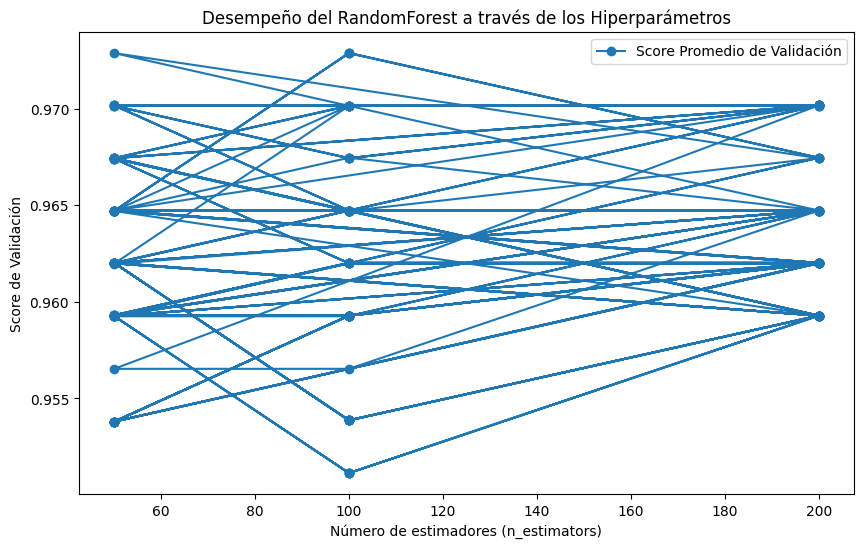

In [ ]:
# Graficar el desempeño durante el GridSearchCV
results = gsearch.cv_results_

plt.figure(figsize=(10, 6))
plt.plot(results['param_n_estimators'], results['mean_test_score'], label='Score Promedio de Validación', marker='o')
plt.xlabel('Número de estimadores (n_estimators)')
plt.ylabel('Score de Validación')
plt.title('Desempeño del RandomForest a través de los Hiperparámetros')
plt.legend()

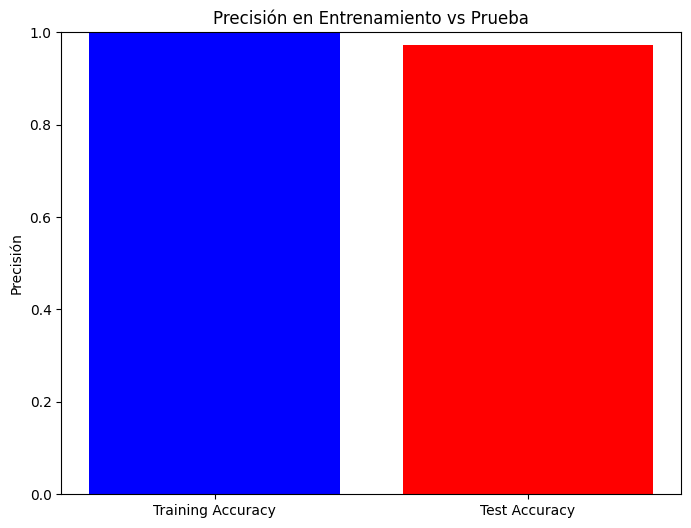

Accuracy en Entrenamiento: 1.0
Accuracy en Prueba: 0.9727272727272728


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Entrenamos el modelo con los datos de entrenamiento
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicciones para los datos de entrenamiento y prueba
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calcular la precisión en los conjuntos de entrenamiento y prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Graficar los resultados
plt.figure(figsize=(8,6))
plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'red'])
plt.ylim([0, 1])
plt.title('Precisión en Entrenamiento vs Prueba')
plt.ylabel('Precisión')
plt.show()

# Para ver un ajuste más detallado con el "Score" de los árboles
train_score = clf.score(X_train, y_train)  # R^2 or accuracy score for regression/classification
test_score = clf.score(X_test, y_test)

print(f'Accuracy en Entrenamiento: {train_score}')
print(f'Accuracy en Prueba: {test_score}')


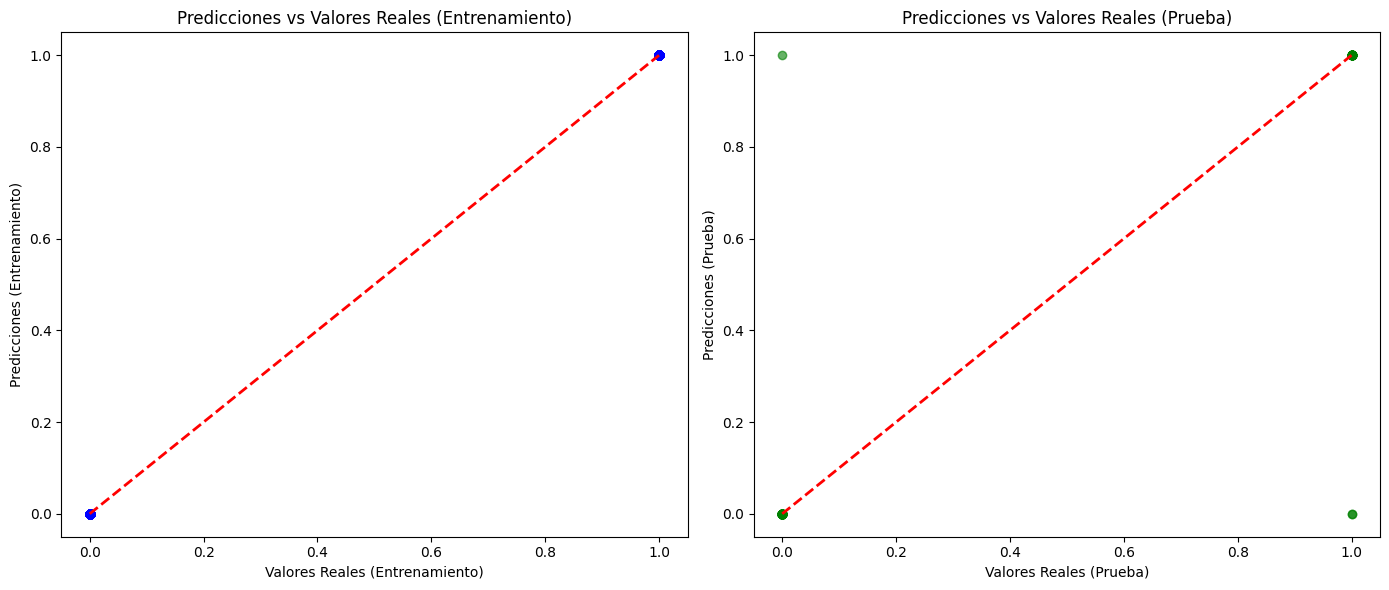

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Entrenar el modelo con los datos de entrenamiento
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicciones para los datos de entrenamiento y prueba
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Crear los gráficos de dispersión para los conjuntos de entrenamiento y prueba
plt.figure(figsize=(14, 6))

# Gráfico para los datos de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.title('Predicciones vs Valores Reales (Entrenamiento)')
plt.xlabel('Valores Reales (Entrenamiento)')
plt.ylabel('Predicciones (Entrenamiento)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)  # Línea de igualdad (y=x)

# Gráfico para los datos de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.title('Predicciones vs Valores Reales (Prueba)')
plt.xlabel('Valores Reales (Prueba)')
plt.ylabel('Predicciones (Prueba)')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)  # Línea de igualdad (y=x)

plt.tight_layout()
plt.show()
